# HW1: Principle Component Aanlysis

### Sec. III. Algorithm Implementation and Development

In [57]:
import os
import cv2
import scipy as sp
import scipy.sparse.linalg
import numpy as np
import numpy.linalg
from glob import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
def get_filename(case):
    global file_list
    for f in file_list:
        if case in f:
            return(f)

In [4]:
#Set Path
YALE_path = "C:/Users/Zhaokai/Dropbox/582_Data_Analysis/hw1_PCA/CroppedYale/" 
output_path = "/Dropbox/CroppedYale/582 Data Analysis/hw1_PCA/CroppedYale_out/"
n = 39 #Number of folder. Each folder contains image data of a single person
folders = []

# Create subpath for each folder (1 folder 1 person); Box each file path into a list
for i in range (1,n+1):
    if i<=9:
        file = YALE_path + "yaleB0%s"% i + "/"
    else:
        file = YALE_path + "yaleB%s"% i + "/"

    folders.append(file)
# print(folders)

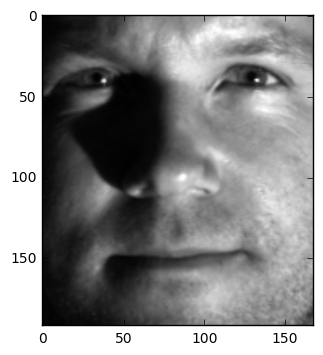

[[  8   8   8 ..., 163 162 161]
 [  8   7   7 ..., 158 158 154]
 [  8   7   7 ..., 157 154 150]
 ..., 
 [ 11   8   8 ...,  74  88 113]
 [ 12   8   8 ...,  80  87 111]
 [ 11   7   8 ...,  91  95 104]]
(192, 168)


In [5]:
from matplotlib import pyplot
image = cv2.imread("yaleB03_P00A-035E-20.pgm", 0)
a=pyplot.imshow(image, pyplot.cm.gray)
pyplot.show(a)

print(image)
print(image.shape)

### Loading

In [242]:
%%time

personal_face_matrix = []
group_face_matrix = np.array([])
counter = 1 #Counter records the id of faces 
height = 192
width = 168
depth = 65 # Each person has 65 face images with differnt shading

for folder in folders:
    file_list_curr = glob(folder+"*.pgm")
    n_file_curr = 0
    
    for img_file in file_list_curr:
#         print("Getting pgm image file %s" % img_file.replace(
#         "C:/Users/Zhaokai/Dropbox/582_Data_Analysis/hw1_PCA/CroppedYale/yaleB",""))
        n_file_curr += 1 
        image = cv2.imread(img_file,0) #Reading Image File using open cv imread() method
        image = image.reshape((height*width)) # Reshape the image from (192,168) into (32256,1)
        personal_face_matrix.append(image) # Shape = (65,width*height): 65 images correspond each face
    
#     personal_face_mean = np.mean(np.array(personal_face_matrix),axis=0).reshape(32256) # Average across col's to get
#                                                                       #a mean face row with shape  = (1,32256)
  
    group_face_matrix = np.vstack(np.array(personal_face_matrix)) 
#     print("Yale Face No.%s: Loading Completed." % counter + "##############" )
    counter += 1

group_face_matrix = np.array(group_face_matrix).astype(np.float64) #Conver from list to np array
print("CONGRADULATIONS: All Yale Faces(Cropped) Successfully Loaded. Ready for Analysis!")
print("Data Matrix Arranged in Shape:")
print(group_face_matrix.shape)

CONGRADULATIONS: All Yale Faces(Cropped) Successfully Loaded. Ready for Analysis!
Data Matrix Arranged in Shape:
(2414, 32256)
Wall time: 4.31 s


## Analysis

In [32]:
### Normalization
normed_face_matrix = preprocessing.scale(group_face_matrix)
cov_matrix = np.cov(normed_face_matrix)
D,S = np.linalg.eig(cov_matrix) #S: Eigen Vectos; D: Eigen Values
###########
# D[37] = 0.0000001 #Note: Covariance Matrirx is positive definite, thus with non-negative eigen values
# D[38] = 0.0000001 #Error: Last two eigen values ~0- due to machine epsilon
###########Sol: Hard coded the last two elements to 0.0

# ## Transformation to Non-whiten & Whiten Eigen Space
# X_eigen = np.dot(np.transpose(S),normed_face_matrix)
# X_white_eigen = np.dot(sp.linalg.fractional_matrix_power(np.diag(D),-1/2),X_eigen)

# ## Compute Covarience
# C_eigen = np.cov(X_eigen)
# C_white_eigen = np.cov(X_white_eigen)

# print(sum(D))
# print(sum(np.diag(C_eigen)))
# print(sum(np.diag(C_white_eigen)))
print(D)
# print(np.diag(C_white_eigen)) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[  8.09511054e+02   1.66914452e+02   1.06824496e+02 ...,   1.41859180e-03
   1.40955502e-03   1.41030381e-03]


## Reconstruction

In [241]:
%time U,Lamda,V_s = sp.sparse.linalg.svds(group_face_matrix)
# %time U,Lamda,V_s = np.linalg.svd(group_face_matrix)

Lamda = np.diag(Lamda)
print(U.shape)
print(Lamda.shape)
print(V_s.shape)

Wall time: 9.72 s
(2414, 6)
(6, 6)
(6, 32256)


In [42]:
### Rank of U
rank_U = np.linalg.matrix_rank(U)
print(rank_U)
print(Lamda.shape)

6
(6, 6)


###  Mode Analysis

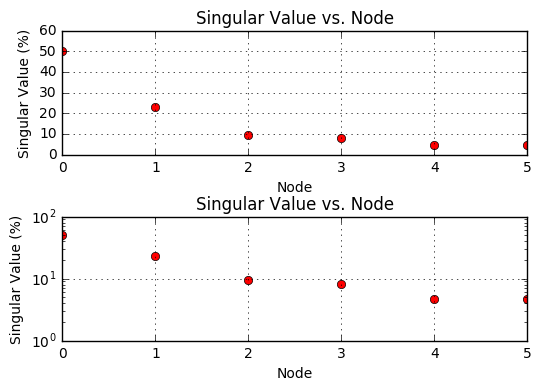

In [161]:
# Sort the modes in descending order for better visualization result 
modes = -np.sort(-np.diag(Lamda))
modes_percent = modes/sum(modes)*100

### Plotting

plt.subplots_adjust(hspace=0.5)

# Normal Scale in %
plt.subplot(211)
plt.plot(modes_percent,'ro')
plt.xlabel('Node')
plt.ylabel('Singular Value (%)')
plt.title('Singular Value vs. Node')
plt.grid(True)

# Log Scale
plt.subplot(212)
plt.semilogy(modes_percent,'ro')
plt.xlabel('Node')
plt.ylabel('Singular Value (%)')
plt.title('Singular Value vs. Node')
plt.grid(True)

plt.show()

By calculating the rank of the processed data matrix, we obtain that the feature space matrix U is full rank. 
    
Note that for a non-square matrix with m rows and n columns, it will always be the case that either the rows or columns (whichever is larger in number) are linearly dependent. Hence when we say that a non-square matrix is full rank, we mean that the row and column rank are as high as possible, given the shape of the matrix. So if there are more rows than columns (m>n), then the matrix is full rank if the matrix is full column rank.  

In [207]:
%%time 

### Reconstrucution:
#Parameteres:
p_faces = [] #Principle faces (6,2414,32256)
p_faces_avg = [] #Averaged Priciple Faces (6,32256)

######### Loop(1/2): Reconstruct six Pricicple Faces as (6,2414,32256)

for i in range(0,modes.shape[0]):
    feature_vector = U[:,i].reshape(U.shape[0],1)
    singluarValue = Lamda[i,:].reshape(1,modes.shape[0])
    faces = np.dot(pd_1,np.dot(singluarValue,V_s)) #shape: (2414,32256)
    p_faces.append(faces)                #shape: (6,2414,32256)

p_faces = np.array(p_faces) #Convert from list to numpy array



######### Loop(2/2): Condese the reconstructed princple face matrix into (6,32256) by averaging all faces
for i in range(0,modes.shape[0]):
    face_avg = np.mean(p_faces[i,:,:],axis=0) #Explaination 1-2:
                                #1)Extract faces in a principle direction as (2414,32256)
                                #2)Collapse by average (2414,32256) into (1,32256)    
    p_faces_avg.append(face_avg)

p_faces_avg = np.array(p_faces_avg)

Wall time: 16.2 s


In [233]:
p_face_1 = p_faces_avg[0,:].reshape(height,width)
p_face_2 = p_faces_avg[1,:].reshape(height,width)  
p_face_3 = p_faces_avg[2,:].reshape(height,width)
p_face_4 = p_faces_avg[3,:].reshape(height,width)
p_face_5 = p_faces_avg[4,:].reshape(height,width)
p_face_6 = p_faces_avg[5,:].reshape(height,width)


p_face_12 = p_face_1+p_face_2
p_face_123 = p_face_1+p_face_2+p_face_3
p_face_1234 = p_face_1+p_face_2+p_face_3+p_face_4



face_1_avg = np.mean(group_face_matrix[0:63,:],axis=0).reshape(height,width)
face_2_avg = np.mean(group_face_matrix[64:127,:],axis=0).reshape(height,width)
face_3_avg = np.mean(group_face_matrix[128:171,:],axis=0).reshape(height,width)

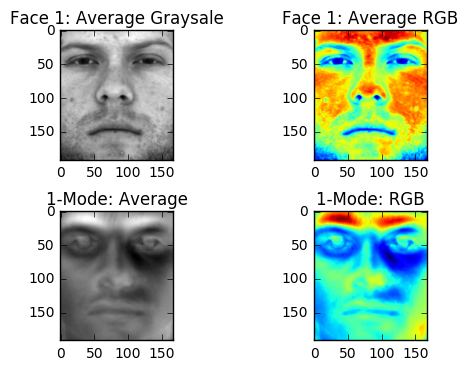

In [237]:
### Consider the first person:
plt.subplots_adjust(hspace=0.4)

plt.subplot(221)
pyplot.imshow(face_1_avg, pyplot.cm.gray)
plt.title("Face 1: Average Graysale")

plt.subplot(222)
pyplot.imshow(face_1_avg)
plt.title("Face 1: Average RGB")


plt.subplot(223)
pyplot.imshow(p_face_1, pyplot.cm.gray)
plt.title("1-Mode: Average")


plt.subplot(224)
pyplot.imshow(p_face_1)
plt.title("1-Mode: RGB")

 
pyplot.show()

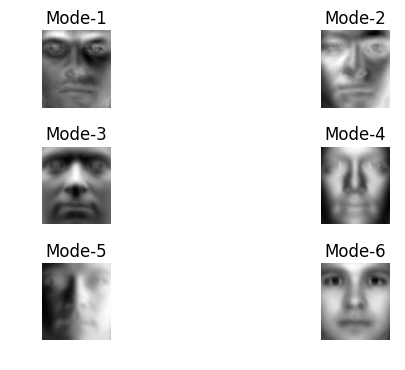

In [238]:
plt.subplots_adjust(hspace=0.5,wspace=0.5)

plt.subplot(321)
pyplot.imshow(p_face_1, pyplot.cm.gray)
plt.title("Mode-1")
plt.axis('off')
plt.axis('off')



plt.subplot(322)
pyplot.imshow(p_face_2, pyplot.cm.gray)
plt.title("Mode-2")
plt.axis('off')


plt.subplot(323)
pyplot.imshow(p_face_3, pyplot.cm.gray)
plt.title("Mode-3")
plt.axis('off')


plt.subplot(324)
pyplot.imshow(p_face_4, pyplot.cm.gray)
plt.title("Mode-4")
plt.axis('off')


plt.subplot(325)
pyplot.imshow(p_face_5, pyplot.cm.gray)
plt.title("Mode-5")
plt.axis('off')


plt.subplot(326)
pyplot.imshow(p_face_6, pyplot.cm.gray)
plt.title("Mode-6")
plt.axis('off')

pyplot.show()

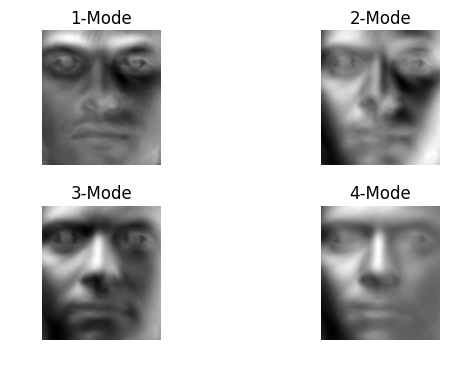

In [236]:
plt.subplots_adjust(hspace=0.3,wspace=0.5)

plt.subplot(221)
pyplot.imshow(p_face_1, pyplot.cm.gray)
plt.title("1-Mode")
plt.axis('off')


plt.subplot(222)
pyplot.imshow(p_face_12, pyplot.cm.gray)
plt.title("2-Mode")
plt.axis('off')


plt.subplot(223)
pyplot.imshow(p_face_123, pyplot.cm.gray)
plt.title("3-Mode")
plt.axis('off')


plt.subplot(224)
pyplot.imshow(p_face_1234, pyplot.cm.gray)
plt.title("4-Mode")
plt.axis('off')

pyplot.show()